In [3]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from collections import Counter
from utils import sigmoid, get_batches, compute_pca, get_dict
import re

In [8]:
with open("hamlet.txt", "r", encoding="utf-8") as f:
    data = f.read()
data = re.sub(r"[,!?;-]", ".", data)
data = nltk.word_tokenize(data)
data = [ch.lower() for ch in data if ch.isalpha() or ch == "."]
print("Number of tokens:", len(data), "\n", data[500:515])

Number of tokens: 36800 
 ['sublime', 'picture', 'of', 'human', 'misery', '.', 'with', 'its', 'harrowing', 'overthrow', 'of', 'a', 'nature', 'great', 'and']


In [9]:
fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary:", len(fdist))
print("Most Frequent Tokens:", fdist.most_common(20))

Size of vocabulary:  4764
Most Frequent Tokens:  [('.', 6022), ('the', 1460), ('of', 914), ('to', 822), ('and', 808), ('a', 661), ('you', 521), ('in', 505), ('footnote', 480), ('i', 462), ('is', 441), ('my', 394), ('it', 374), ('that', 348), ('not', 317), ('this', 301), ('with', 285), ('his', 254), ('your', 243), ('for', 240)]


In [10]:
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
print("Size of vocabulary:", V)

Size of vocabulary: 4764


In [11]:
print("Index of the word 'king':", word2Ind["king"])
print("Word which has index 2743:", Ind2word[2743])

Index of the word 'king': 2314
Word which has index 2743: neglect


In [12]:
def initialize_model(N, V, random_seed=1):
    """
    Inputs:
        N: dimension of hidden vector
        V: dimension of vocabulary
        random_seed: seed for consistent results in tests
    Outputs:
        W1, W2, b1, b2: initialized weights and biases
    """
    np.random.seed(random_seed)

    W1 = np.random.rand(N, V)
    W2 = np.random.rand(V, N)
    b1 = np.random.rand(N, 1)
    b2 = np.random.rand(V, 1)

    return W1, W2, b1, b2

In [13]:
tmp_N = 4
tmp_V = 10
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N, tmp_V)
assert tmp_W1.shape == ((tmp_N, tmp_V))
assert tmp_W2.shape == ((tmp_V, tmp_N))
print(f"tmp_W1.shape: {tmp_W1.shape}")
print(f"tmp_W2.shape: {tmp_W2.shape}")
print(f"tmp_b1.shape: {tmp_b1.shape}")
print(f"tmp_b2.shape: {tmp_b2.shape}")

tmp_W1.shape: (4, 10)
tmp_W2.shape: (10, 4)
tmp_b1.shape: (4, 1)
tmp_b2.shape: (10, 1)


In [14]:
def softmax(z):
    """
    Inputs:
        z: output scores from the hidden layer
    Outputs:
        yhat: prediction (estimate of y)
    """
    yhat = np.exp(z) / np.sum(np.exp(z), axis=0)
    return yhat

In [15]:
tmp = np.array([[1, 2, 3], [1, 1, 1]])
tmp_sm = softmax(tmp)
display(tmp_sm)

array([[0.5       , 0.73105858, 0.88079708],
       [0.5       , 0.26894142, 0.11920292]])

In [16]:
def forward_prop(x, W1, W2, b1, b2):
    """
    Inputs:
        x: average one-hot vector for the context
        W1,W2,b1,b2: weights and biases to be learned
    Outputs:
        z: output score vector
    """
    h = W1 @ x + b1
    h = np.maximum(0, h)
    z = W2 @ h + b2
    return z, h

In [17]:
tmp_N = 2
tmp_V = 3
tmp_x = np.array([[0, 1, 0]]).T
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(N=tmp_N, V=tmp_V)

print(f"x has shape {tmp_x.shape}")
print(f"N is {tmp_N} and vocabulary size V is {tmp_V}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print("call forward prop")
print()

print(f"z has shape {tmp_z.shape}")
print("z has values:")
print(tmp_z)

print(f"h has shape {tmp_h.shape}")
print("h has values:")
print(tmp_h)

x has shape (3, 1)
N is 2 and vocabulary size V is 3
call forward prop

z has shape (3, 1)
z has values:
[[0.55379268]
 [1.58960774]
 [1.50722933]]
h has shape (2, 1)
h has values:
[[0.92477674]
 [1.02487333]]


In [18]:
def compute_cost(y, yhat, batch_size):
    logprobs = np.multiply(np.log(yhat), y) + np.multiply(np.log(1 - yhat), 1 - y)
    cost = -1 / batch_size * np.sum(logprobs)
    cost = np.squeeze(cost)
    return cost

In [19]:
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V, tmp_C, tmp_batch_size))

print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N, tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_cost = compute_cost(tmp_y, tmp_yhat, tmp_batch_size)
print("call compute_cost")
print(f"tmp_cost {tmp_cost:.4f}")

tmp_x.shape (4764, 4)
tmp_y.shape (4764, 4)
tmp_W1.shape (50, 4764)
tmp_W2.shape (4764, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (4764, 1)
tmp_z.shape: (4764, 4)
tmp_h.shape: (50, 4)
tmp_yhat.shape: (4764, 4)
call compute_cost
tmp_cost 18.7009


In [20]:
def back_prop(x, yhat, y, h, W1, W2, b1, b2, batch_size):
    """
    Inputs:
        x:  average one hot vector for the context
        yhat: prediction (estimate of y)
        y:  target vector
        h:  hidden vector (see eq. 1)
        W1, W2, b1, b2:  matrices and biases
        batch_size: batch size
     Outputs:
        grad_W1, grad_W2, grad_b1, grad_b2:  gradients of matrices and biases
    """
    l1 = np.dot(W2.T, yhat - y)
    l1 = np.maximum(0, l1)
    grad_W1 = np.dot(l1, x.T) / batch_size
    grad_W2 = np.dot(yhat - y, h.T) / batch_size
    grad_b1 = np.sum(l1, axis=1, keepdims=True) / batch_size
    grad_b2 = np.sum(yhat - y, axis=1, keepdims=True) / batch_size

    return grad_W1, grad_W2, grad_b1, grad_b2

In [21]:
tmp_C = 2
tmp_N = 50
tmp_batch_size = 4
tmp_word2Ind, tmp_Ind2word = get_dict(data)
tmp_V = len(word2Ind)

tmp_x, tmp_y = next(get_batches(data, tmp_word2Ind, tmp_V, tmp_C, tmp_batch_size))

print("get a batch of data")
print(f"tmp_x.shape {tmp_x.shape}")
print(f"tmp_y.shape {tmp_y.shape}")

print()
print("Initialize weights and biases")
tmp_W1, tmp_W2, tmp_b1, tmp_b2 = initialize_model(tmp_N, tmp_V)

print(f"tmp_W1.shape {tmp_W1.shape}")
print(f"tmp_W2.shape {tmp_W2.shape}")
print(f"tmp_b1.shape {tmp_b1.shape}")
print(f"tmp_b2.shape {tmp_b2.shape}")

print()
print("Forwad prop to get z and h")
tmp_z, tmp_h = forward_prop(tmp_x, tmp_W1, tmp_W2, tmp_b1, tmp_b2)
print(f"tmp_z.shape: {tmp_z.shape}")
print(f"tmp_h.shape: {tmp_h.shape}")

print()
print("Get yhat by calling softmax")
tmp_yhat = softmax(tmp_z)
print(f"tmp_yhat.shape: {tmp_yhat.shape}")

tmp_m = 2 * tmp_C
tmp_grad_W1, tmp_grad_W2, tmp_grad_b1, tmp_grad_b2 = back_prop(
    tmp_x, tmp_yhat, tmp_y, tmp_h, tmp_W1, tmp_W2, tmp_b1, tmp_b2, tmp_batch_size
)

print()
print("call back_prop")
print(f"tmp_grad_W1.shape {tmp_grad_W1.shape}")
print(f"tmp_grad_W2.shape {tmp_grad_W2.shape}")
print(f"tmp_grad_b1.shape {tmp_grad_b1.shape}")
print(f"tmp_grad_b2.shape {tmp_grad_b2.shape}")

get a batch of data
tmp_x.shape (4764, 4)
tmp_y.shape (4764, 4)

Initialize weights and biases
tmp_W1.shape (50, 4764)
tmp_W2.shape (4764, 50)
tmp_b1.shape (50, 1)
tmp_b2.shape (4764, 1)

Forwad prop to get z and h
tmp_z.shape: (4764, 4)
tmp_h.shape: (50, 4)

Get yhat by calling softmax
tmp_yhat.shape: (4764, 4)

call back_prop
tmp_grad_W1.shape (50, 4764)
tmp_grad_W2.shape (4764, 50)
tmp_grad_b1.shape (50, 1)
tmp_grad_b2.shape (4764, 1)


In [22]:
def gradient_descent(data, word2Ind, N, V, num_iters, alpha=0.03):
    """
    This is the gradient_descent function

      Inputs:
        data:      text
        word2Ind:  words to Indices
        N:         dimension of hidden vector
        V:         dimension of vocabulary
        num_iters: number of iterations
     Outputs:
        W1, W2, b1, b2:  updated matrices and biases

    """
    W1, W2, b1, b2 = initialize_model(N, V, random_seed=8855)
    batch_size = 128
    iters = 0
    C = 2
    for x, y in get_batches(data, word2Ind, V, C, batch_size):
        z, h = forward_prop(x, W1, W2, b1, b2)
        yhat = softmax(z)
        cost = compute_cost(y, yhat, batch_size)
        if (iters + 1) % 10 == 0:
            print(f"iters: {iters+1} cost: {cost:.6f}")
        grad_W1, grad_W2, grad_b1, grad_b2 = back_prop(
            x, yhat, y, h, W1, W2, b1, b2, batch_size
        )
        W1 = W1 - alpha * grad_W1
        W2 = W2 - alpha * grad_W2
        b1 = b1 - alpha * grad_b1
        b2 = b2 - alpha * grad_b2
        iters += 1
        if iters == num_iters:
            break
        if iters % 100 == 0:
            alpha *= 0.66

    return W1, W2, b1, b2

In [23]:
C = 2
N = 50
word2Ind, Ind2word = get_dict(data)
V = len(word2Ind)
num_iters = 150
print("Call gradient_descent")
W1, W2, b1, b2 = gradient_descent(data, word2Ind, N, V, num_iters)

Call gradient_descent
iters: 10 cost: 0.525015
iters: 20 cost: 0.092373
iters: 30 cost: 0.050474
iters: 40 cost: 0.034724
iters: 50 cost: 0.026468
iters: 60 cost: 0.021385
iters: 70 cost: 0.017941
iters: 80 cost: 0.015453
iters: 90 cost: 0.013572
iters: 100 cost: 0.012099
iters: 110 cost: 0.011253
iters: 120 cost: 0.010551
iters: 130 cost: 0.009932
iters: 140 cost: 0.009382
iters: 150 cost: 0.008889


In [28]:
from matplotlib import pyplot

%config InlineBackend.figure_format = 'svg'
words = ["king", "queen", "lord", "man", "woman", "prince", "ophelia", "rich", "happy"]
embs = (W1.T + W2) / 2.0
idx = [word2Ind[word] for word in words]
X = embs[idx, :]
print(X.shape, idx)

(9, 50) [2314, 3335, 2472, 2526, 4697, 3211, 2874, 3530, 1921]


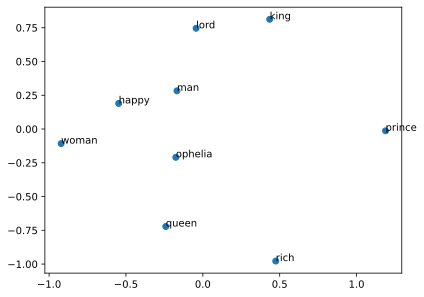

In [29]:
result = compute_pca(X, 2)
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()